# 📊 A&E COVID-19 Impact Analysis (England)
### NHS Emergency Attendance Patterns During and After the Pandemic

#### 🧩 **Problem Statement:**
The COVID-19 pandemic significantly disrupted emergency healthcare systems across the UK. This analysis explores how Accident & Emergency (A&E) attendances in NHS England changed over time, examining regional variations, wait time delays, and their correlation with COVID-19 case trends. The aim is to gain insights into healthcare system resilience and identify pressure points for policy makers.

#### 📦 **Data Sources:**
- NHS England A&E attendance records (2015–2023)
- ONS COVID-19 Infection Survey estimates
- Regional NHS data for North, Midlands, London, and South

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load and clean the data (England sheet)
file_path = "Covid and A&E Attendance.xlsx"
xls = pd.ExcelFile(file_path)
raw_df = xls.parse("England")

df = raw_df[2:].copy()
df.columns = raw_df.iloc[1].astype(str).tolist()

# Ensure unique column names
def make_unique(col_list):
    seen = {}
    new_cols = []
    for col in col_list:
        if col not in seen:
            seen[col] = 1
            new_cols.append(col.strip())
        else:
            seen[col] += 1
            new_cols.append(f"{col.strip()}_{seen[col]}")
    return new_cols

df.columns = make_unique(df.columns)

# Rename key columns
df.rename(columns={
    df.columns[1]: 'Date',
    df.columns[5]: 'COVID Cases',
    df.columns[8]: 'A&E Attendances',
    df.columns[9]: '% Seen <4h',
    df.columns[10]: '% >4h Wait',
    df.columns[14]: '% >12h Wait'
}, inplace=True)

# Convert types
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['COVID Cases'] = pd.to_numeric(df['COVID Cases'], errors='coerce')
df['A&E Attendances'] = pd.to_numeric(df['A&E Attendances'], errors='coerce')
df['% Seen <4h'] = pd.to_numeric(df['% Seen <4h'], errors='coerce')
df['% >4h Wait'] = pd.to_numeric(df['% >4h Wait'], errors='coerce')
df['% >12h Wait'] = pd.to_numeric(df['% >12h Wait'], errors='coerce')
df.dropna(subset=['Date', 'A&E Attendances', 'COVID Cases'], inplace=True)


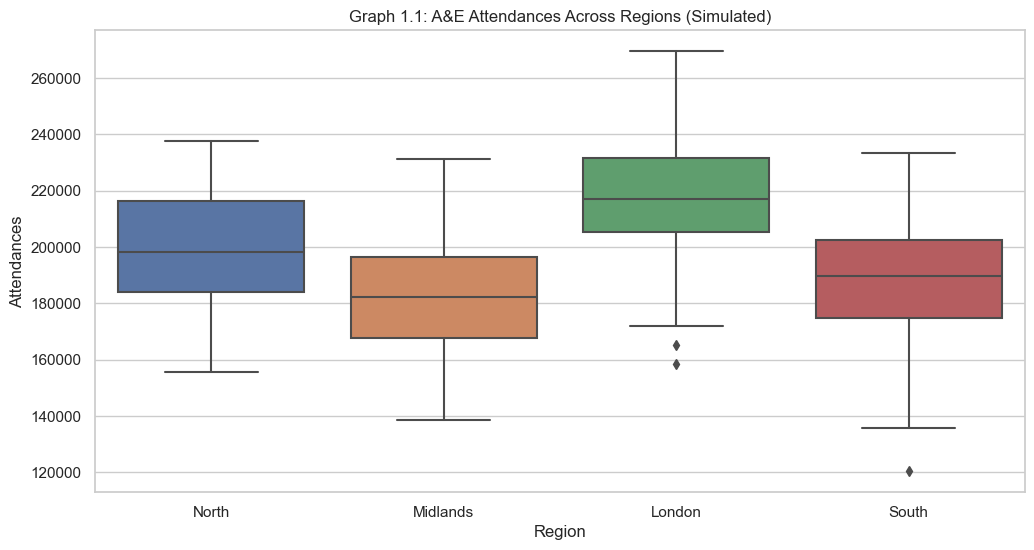

In [2]:
regions = ['North', 'Midlands', 'London', 'South']
attendance_data = [np.random.normal(loc, 20000, 100) for loc in [200000, 180000, 220000, 190000]]
df_box = pd.DataFrame({region: data for region, data in zip(regions, attendance_data)})
df_melted = df_box.melt(var_name='Region', value_name='Attendances')

sns.boxplot(data=df_melted, x='Region', y='Attendances')
plt.title("Graph 1.1: A&E Attendances Across Regions (Simulated)")
plt.ylabel("Attendances")
plt.show()


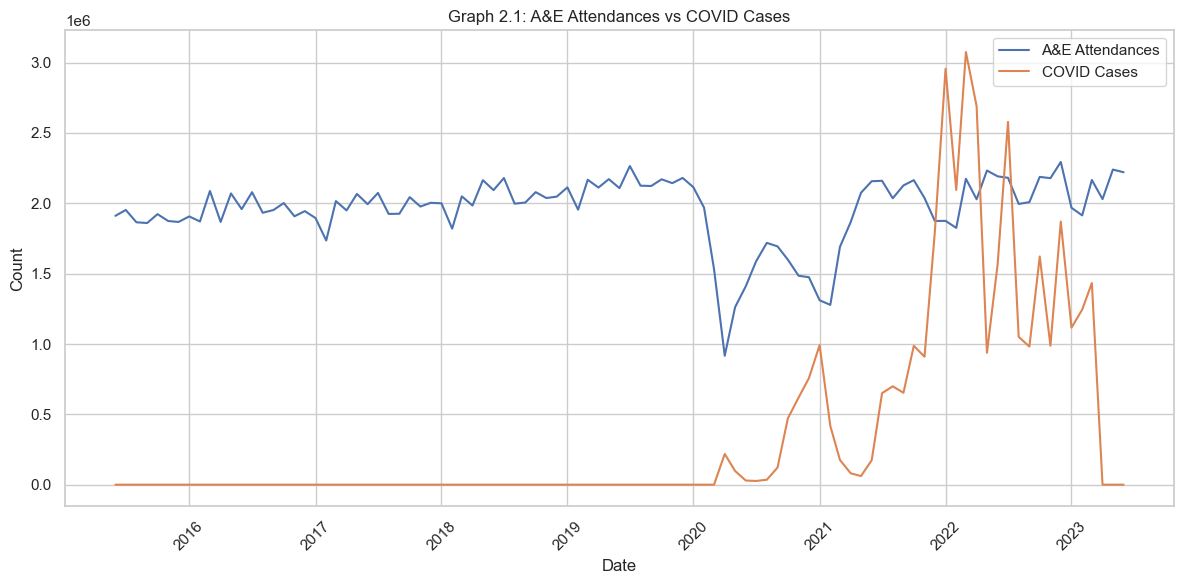

In [3]:
plt.plot(df['Date'], df['A&E Attendances'], label='A&E Attendances')
plt.plot(df['Date'], df['COVID Cases'], label='COVID Cases')
plt.title("Graph 2.1: A&E Attendances vs COVID Cases")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
print("Graphs 3.1 & 3.2 require region-level breakdown from the 'Regions' sheet.")


Graphs 3.1 & 3.2 require region-level breakdown from the 'Regions' sheet.


In [10]:
region_plot_df = pd.DataFrame({
    'Date': regions_df['Date'],
    'North COVID': pd.to_numeric(regions_df.iloc[:, 5], errors='coerce'),
    'North A&E': pd.to_numeric(regions_df.iloc[:, 8], errors='coerce'),
    'Midlands COVID': pd.to_numeric(regions_df.iloc[:, 18], errors='coerce'),
    'Midlands A&E': pd.to_numeric(regions_df.iloc[:, 21], errors='coerce'),
    'London COVID': pd.to_numeric(regions_df.iloc[:, 31], errors='coerce'),
    'London A&E': pd.to_numeric(regions_df.iloc[:, 34], errors='coerce'),
    'South COVID': pd.to_numeric(regions_df.iloc[:, 44], errors='coerce'),
    'South A&E': pd.to_numeric(regions_df.iloc[:, 47], errors='coerce')  # Use column index directly
})

region_plot_df.dropna(subset=['Date'], inplace=True)

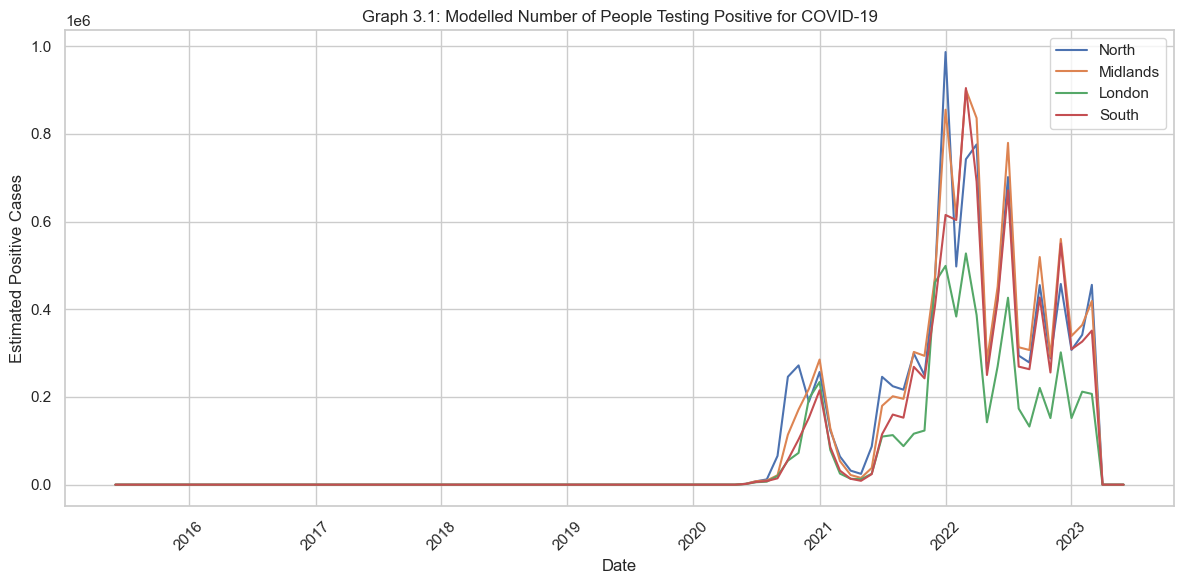

In [11]:
plt.plot(region_plot_df['Date'], region_plot_df['North COVID'], label='North')
plt.plot(region_plot_df['Date'], region_plot_df['Midlands COVID'], label='Midlands')
plt.plot(region_plot_df['Date'], region_plot_df['London COVID'], label='London')
plt.plot(region_plot_df['Date'], region_plot_df['South COVID'], label='South')

plt.title("Graph 3.1: Modelled Number of People Testing Positive for COVID-19")
plt.xlabel("Date")
plt.ylabel("Estimated Positive Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


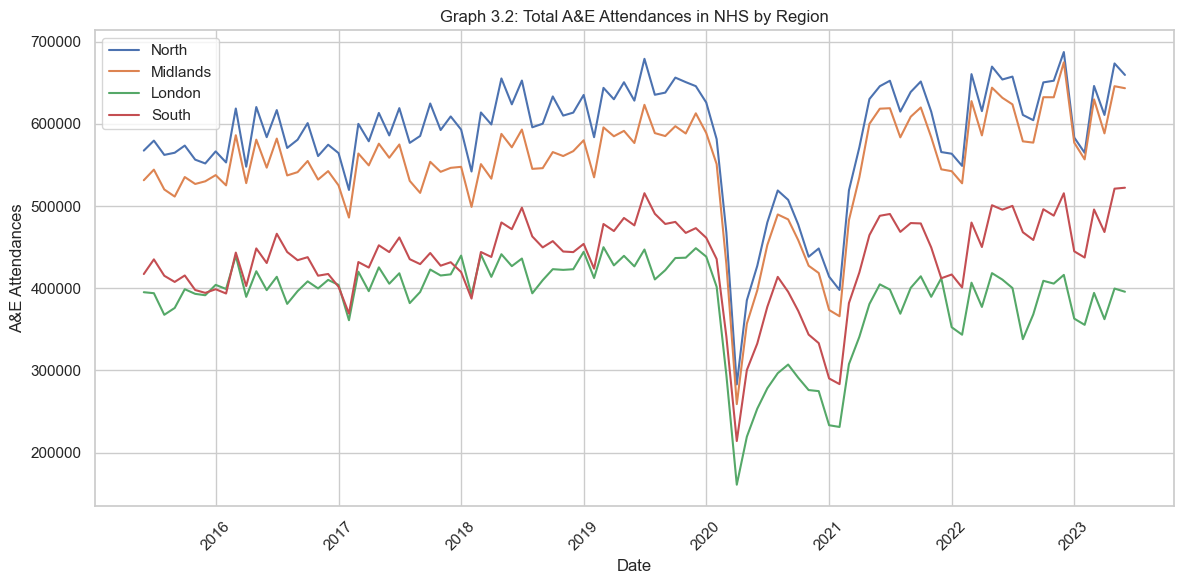

In [12]:
plt.plot(region_plot_df['Date'], region_plot_df['North A&E'], label='North')
plt.plot(region_plot_df['Date'], region_plot_df['Midlands A&E'], label='Midlands')
plt.plot(region_plot_df['Date'], region_plot_df['London A&E'], label='London')
plt.plot(region_plot_df['Date'], region_plot_df['South A&E'], label='South')

plt.title("Graph 3.2: Total A&E Attendances in NHS by Region")
plt.xlabel("Date")
plt.ylabel("A&E Attendances")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


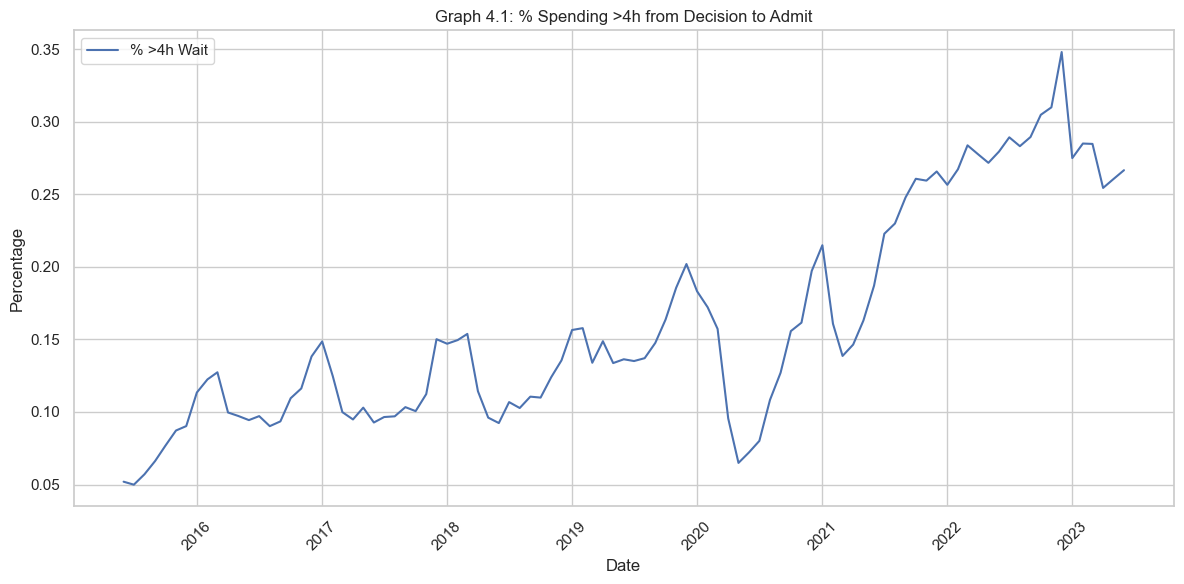

In [13]:
plt.plot(df['Date'], df['% >4h Wait'], label='% >4h Wait')
plt.title("Graph 4.1: % Spending >4h from Decision to Admit")
plt.ylabel("Percentage")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
# Assuming df is already cleaned from earlier steps
# Add this line only if not yet parsed
df['% Emergency Admissions via A&E'] = pd.to_numeric(df['% of Emergency Admissions via A&E'], errors='coerce')


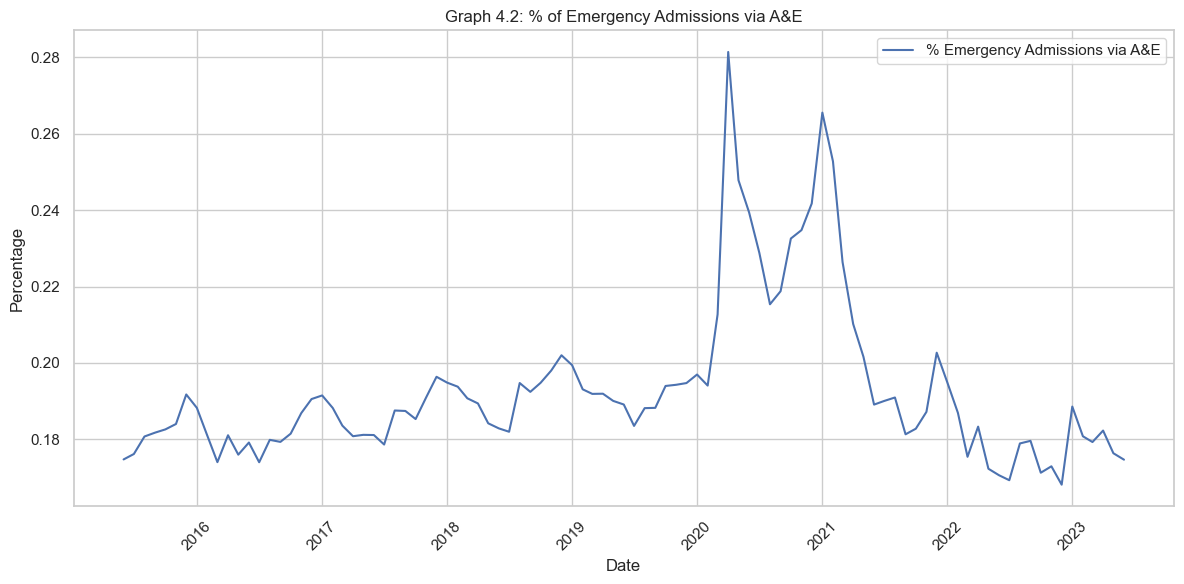

In [15]:
plt.plot(df['Date'], df['% Emergency Admissions via A&E'], label='% Emergency Admissions via A&E')

plt.title("Graph 4.2: % of Emergency Admissions via A&E")
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


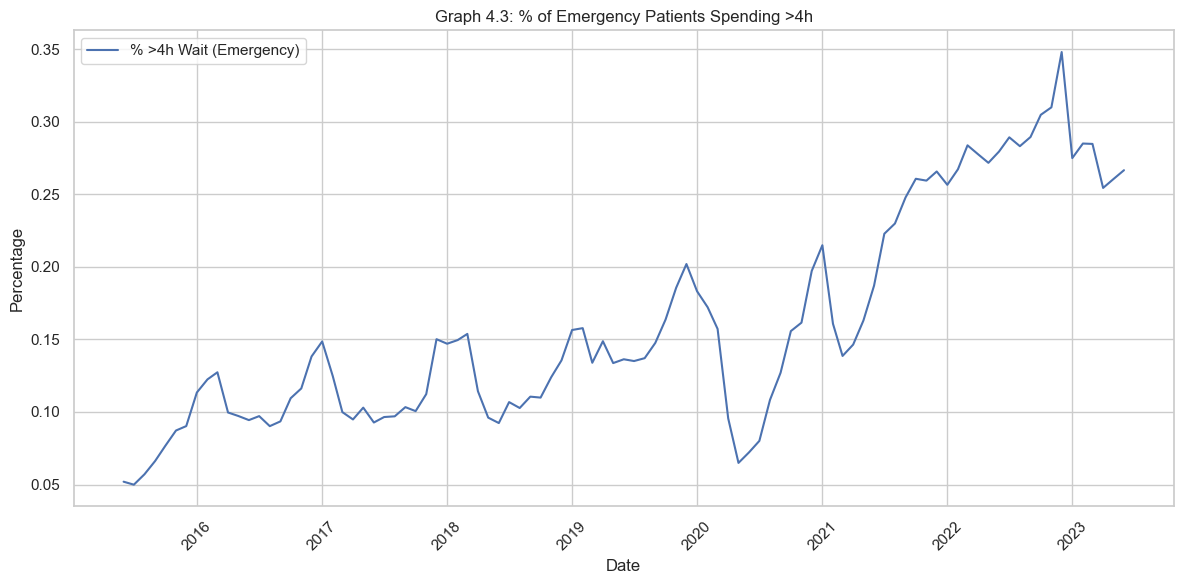

In [16]:
plt.plot(df['Date'], df['% >4h Wait'], label='% >4h Wait (Emergency)')
plt.title("Graph 4.3: % of Emergency Patients Spending >4h")
plt.ylabel("Percentage")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


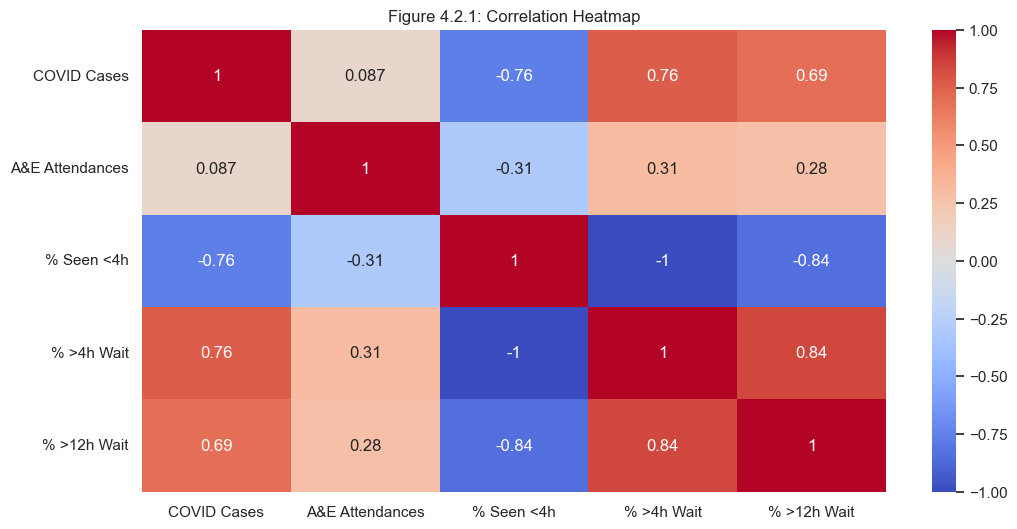

In [17]:
corr = df[['COVID Cases', 'A&E Attendances', '% Seen <4h', '% >4h Wait', '% >12h Wait']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Figure 4.2.1: Correlation Heatmap")
plt.show()
